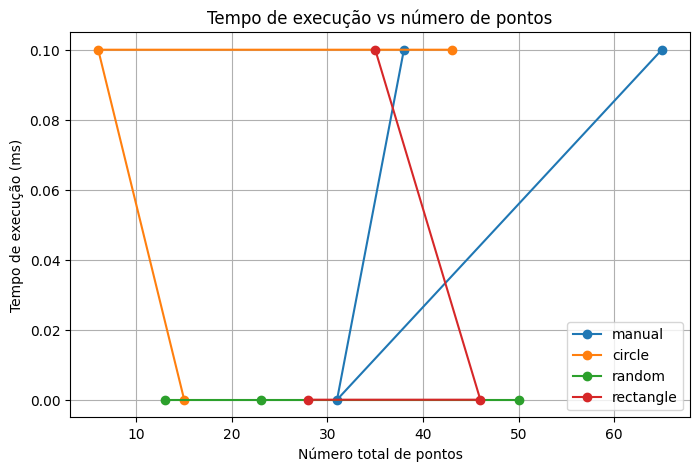

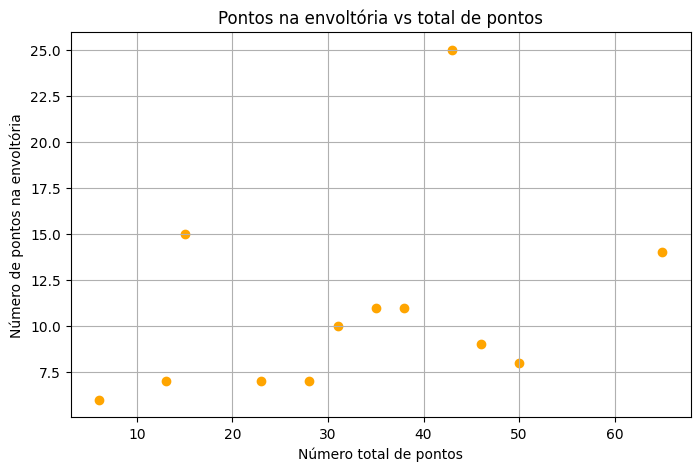

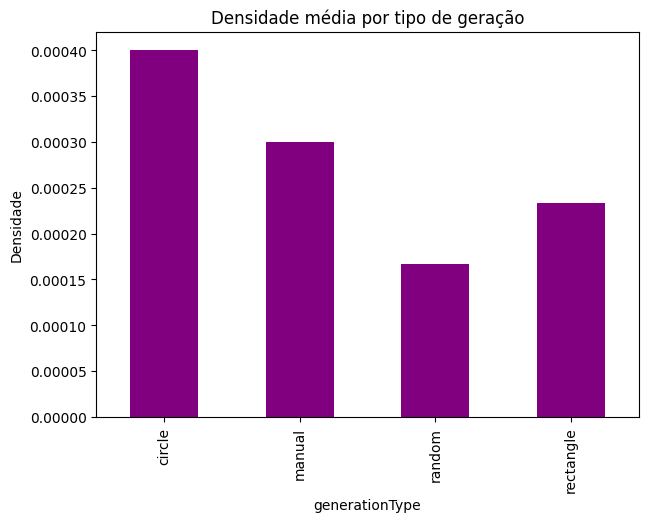

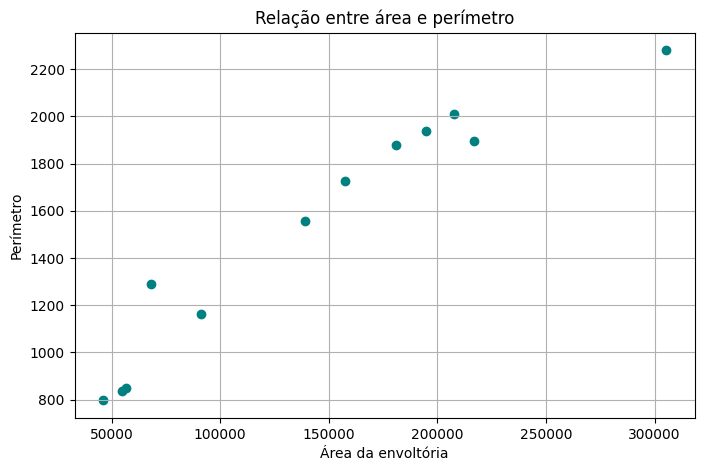

In [1]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt

arquivos = glob.glob("/content/*.json")

data = []
for arq in arquivos:
    with open(arq, "r") as f:
        data.append(json.load(f))

df = pd.DataFrame(data)
for col in ["n_total", "n_hull", "elapsed_time_ms", "hull_area", "hull_perimeter", "density"]:
    df[col] = pd.to_numeric(df[col])

# ============ 1. Tempo x n_total ============
plt.figure(figsize=(8,5))
for tipo in df['generationType'].unique():
    subset = df[df['generationType'] == tipo]
    plt.plot(subset['n_total'], subset['elapsed_time_ms'], 'o-', label=tipo)
plt.xlabel("Número total de pontos")
plt.ylabel("Tempo de execução (ms)")
plt.title("Tempo de execução vs número de pontos")
plt.legend()
plt.grid(True)
plt.show()

# ============ 2. n_hull x n_total ============
plt.figure(figsize=(8,5))
plt.scatter(df['n_total'], df['n_hull'], c='orange')
plt.xlabel("Número total de pontos")
plt.ylabel("Número de pontos na envoltória")
plt.title("Pontos na envoltória vs total de pontos")
plt.grid(True)
plt.show()

# ============ 3. Densidade média por tipo ============
plt.figure(figsize=(7,5))
df.groupby("generationType")["density"].mean().plot(kind="bar", color="purple")
plt.title("Densidade média por tipo de geração")
plt.ylabel("Densidade")
plt.show()

# ============ 4. Área x Perímetro ============
plt.figure(figsize=(8,5))
plt.scatter(df['hull_area'], df['hull_perimeter'], c='teal')
plt.xlabel("Área da envoltória")
plt.ylabel("Perímetro")
plt.title("Relação entre área e perímetro")
plt.grid(True)
plt.show()
